# H2.7 Recursie</h1>

## 1. Recursie

#### Oefening 1

In de wiskunde wordt de faculteit van een natuurlijk getal berekend door het product te nemen van alle getallen kleiner dan of gelijk aan het natuurlijk getal. Dus bijvoorbeeld:

`faculteit(5) = 5*4*3*2*1 = 120`<br>
`faculteit(11) = 11*10*9*8*7*6*5*4*3*2*1 = 39916800`

Definiëer een functie `faculteit` die de faculteit van een willekeurig natuurlijk getal berekend.

Wellicht gebruikte je je kennis van lussen om een algoritme op te stellen. Je kan echter ook gebruik maken van functies om herhaling, zonder lussen, te implementeren. De gebruikte methode heet de **recuriemethode**. Regelmatig zal recursie toepassen leesbaardere, en vaak ook efficiëntere, code opleveren.

> Een **recursieve functie** is een functie die zichzelf oproept.

#### Voorbeeld

De bitbank geeft per maand 1% interest op het bedrag dat de vorige maand op een rekening stond. Onderstaande functie `bitbank` berekent via recursie hoeveel geld er na `n` maanden op de rekening zal staan bij een gegeven `startbedrag`.

In [ ]:
def bitbank(startbedrag, n):
  if n == 0:
    return startbedrag
  else:
    bedrag_vorige_maand = bitbank(startbedrag, n-1)
    bedrag_huidige_maand = bedrag_vorige_maand * 0.01
    return bedrag_huidige_maand

print(bitbank(100, 2))

Via Python Tutor kan je de stappen die Python zet volgen.

In [ ]:
### Genereer PythonTutor embed
%%HTML
<iframe width="800" height="600" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=def%20bitbank%28startbedrag,%20n%29%3A%0A%20%20if%20n%20%3D%3D%200%3A%0A%20%20%20%20return%20startbedrag%0A%20%20else%3A%0A%20%20%20%20bedrag_vorige_maand%20%3D%20bitbank%28startbedrag,%20n-1%29%0A%20%20%20%20bedrag_huidige_maand%20%3D%20bedrag_vorige_maand%20*%200.01%0A%20%20%20%20return%20bedrag_huidige_maand%0A%0Aprint%28bitbank%28100,%202%29%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

In de 5e lijn wordt de functie `bitbank` opnieuw opgeroepen met nieuwe waarden voor de argumenten. Python keert dan terug naar het begin van de functiecode en slaat de nieuwe waarden van de argumenten op in het geheugen, naast de oude waarden. Dit blijft zicht herhalen zolang Python de volledige functiecode kan doorlopen (vandaar de conditie `n == 0`) en naar de laatste oproep kan terugkeren. Hiervoor worden argumenten die in het geheugen werden opgeslaan gebruikt.

> Een recursieve functie bestaat uit twee onderdelen:
- Een **recursiestap** die de code bevat waaring de functie zichzelf terug oproept.
- Een **stopconditie** die een reeks recursiestappen onderbreekt.

Merk op dat, om de argumenten van elke oproep in het geheugen op te slaan, een reeds gekende datastructuur wordt gehanteerd: De stapel. Wanneer een functie recursief wordt opgeroepen worden de argumenten op de stapel geplaatst (push). Na het uitvoeren van een recursiestap worden de argumenten terug achteraan van de stapel gehaald (pop). In het geval van recursie spreken we van een **call stack**.

#### Oefening 2

Herschrijft de functie `faculteit` als een recursieve functie.


In [ ]:
def faculteit(n):
  if n == 1:
  return faculteit(n-1)*n

#### Oefening 3

De rij van Fibonacci is een reeks getallen waarbij elk getal de som is van de vorige getallen. De eerste twee elementen zijn beiden `1`: </br>
$(f_n) = (1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144,...)$

Schrijf een recursieve functie die het `n`-de element van de rij van Fibonacci oproept.

In [1]:
def fibonacci(n):
  if n == 1 or n == 2:
    return 1
  else:
    return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(13))

233


### 1.1 Oneindige recursie

#### Voorbeeld

Voer onderstaande code uit en bestudeer waarom ze een error oplevert.

In [ ]:
def functie(n):
  return functie(n-1)
functie(4)

Het ontbreken van een stopconditie leidt tot **oneindige recursie**. De functie blijft daarbij zichtzelf oproepen tot een punt dat de call stack het volledige werkgeheugen inneemt.

### 2.2 Recursie VS iteratie

Het voordeel van recursie is dat, in tegenstelling tot itaratie, vooraf geen (of toch minder) variabelen moet worden gedefinieerd (zoals tellervariabelen, lijsten waarover moet worden geïtereerd,...). Bij recursie gebeurt dit impliciet via de call stack. Het resultaat is kortere, en dus leesbaardere code.

Het nadeel is dat recursie minder eenvoudig is om te programmeren voor ingewikkeldere toepassingen. Aandacht voor fouten zoals oneindige recursie is steeds vereist.

## 2. Verdeel en heers

> **Verdeel en heers** is een algoritmische techniek waarbij het recursieprincipe wordt gebruikt om een probleem herhaaldelijk op te splitsen in deelproblemen, tot het probleem triviaal op te lossen valt.

Een voorbeeld is mergesort.

### 2.1 Mergesort

> **Mergesort** is een sorteeralgoritme dat via verdeel en heers is opgesteld.

Mergesort werkt als volgt:

- Verdeel:</br> De recursiestap verdeelt een rij steeds in twee even lange delen tot elke deelrij lengte 1 heeft. Het is triviaal dat een rij met slechts 1 element gesorteerd is.
- Heers:</br> Nadien worden telkens twee rijen, die beiden gesorteerd zijn, samengevoegd (vandaar de naam *mergesort*) tot 1 rij, die ook gesorteerd is.

**Visualisatie**

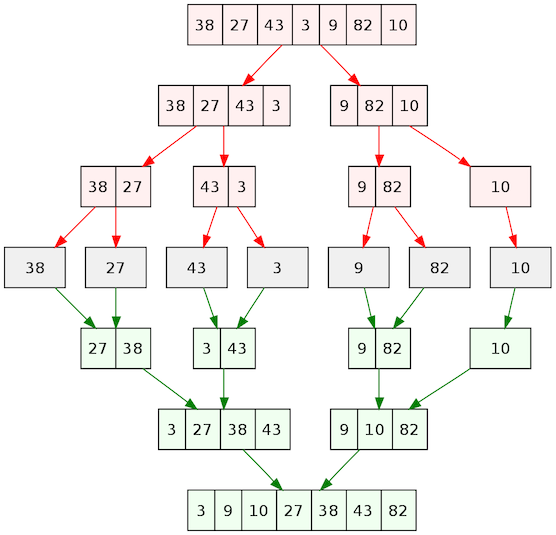

**Code**

In [ ]:
def mergesort(rij):
    if len(rij) <= 1:
        return rij                      # stopconditie
    midden = int(len(rij)/2)
    rij_links  = mergesort(rij[:midden])      # recursieve oproep op linkerdeel
    rij_rechts = mergesort(rij[midden:])      # recursieve oproep op rechterdeel

    # twee gesoorteerde rijen samenvoegen
    teller = 0
    while len(rij_links)!=0 and len(rij_rechts)!=0:
        if rij_links[0] < rij_rechts[0]:         # vergelijk de eerste van links met de eerste van rechts
            rij[teller] = rij_links.pop(0)   # verwijder eerste van links en plak ze in de rij
        else:
            rij[teller] = rij_rechts.pop(0)  # verwijder eerste van rechts en plak ze in de rij
        teller += 1

    return rij[:-len(rij_links+rij_rechts)] + rij_links + rij_rechts  #of links of rechts is leeg, dus dit kan

print(mergesort([1, 7, 3, 4]))

#### Oefening 4

Pas mergesort toe op de volgende lijst:
`[1, 5, 7, -1, 12, 4, 9, 3]`


...

### 2.2 Eigenschappen

Verdeel en heers biedt ons een nieuwe manier om bepaalde problemen te benaderen. Het laat toe om puzzels op te lossen zoals [de toren van Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi).

Verdeel en heers zorgt typisch voor snellere algoritmen dan iteratieve technieken. Zo zijn bijvoorbeeld voor mergesort minder stappen vereist om het sorteerprobleem op te lossen dan zijn tegenhanger, insertionsort. Dit voordeel is nog prominenter als meerdere rekeneenheden ter beschikking zijn. Zo kan elke eenheid een recursiestap tegelijk uitrekenen.

Een nadeel is dat verdeel en heers vaak geheugenintensief is. Elke tussenoplossing moet op een call stack worden opgeslagen.